<a href="https://colab.research.google.com/github/AthSaad/compito-4-febbraio/blob/main/Arete_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Description: Questo programma utilizza una rete neurale chiamata LSTM (Long Short Term Memory)

In [22]:
#Import delle librerie

import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [23]:
#Import del prezzo di mercato

df= web.DataReader('NFLX',data_source='yahoo',start='2012-01-01',end='today',)

#Output del risultato

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
...,...,...,...,...,...,...
2021-04-27,512.989990,504.579987,512.619995,505.549988,3761300.0,505.549988
2021-04-28,508.399994,503.339996,505.200012,506.519989,3193000.0,506.519989
2021-04-29,509.290009,499.000000,507.600006,509.000000,5127800.0,509.000000


<function matplotlib.pyplot.show>

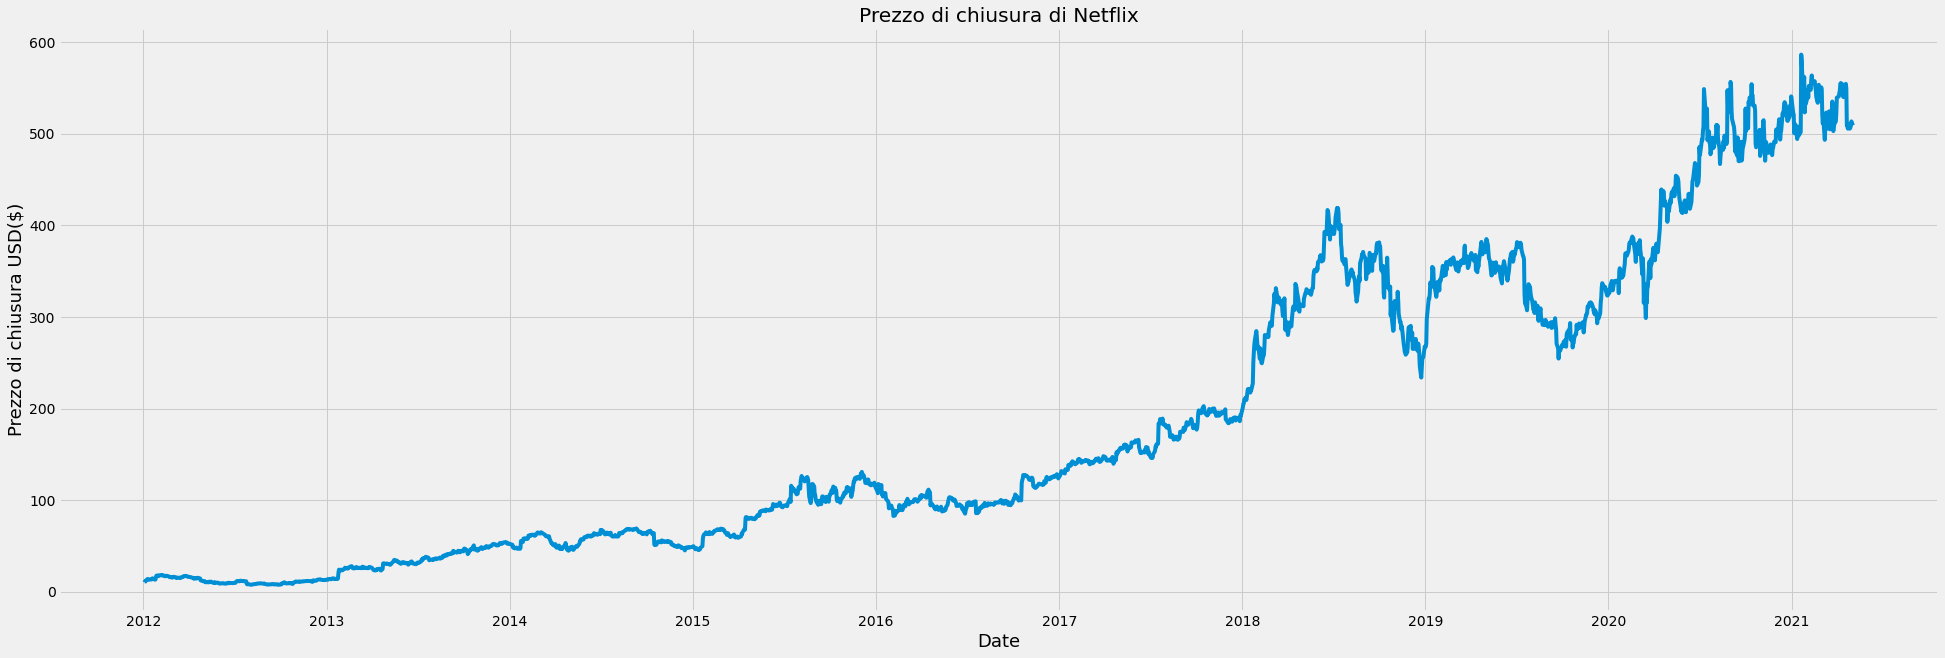

In [24]:
#Visualizza il prezzo di chiusura
plt.figure(figsize=(30,10))
plt.title('Prezzo di chiusura di Netflix')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize= 18)
plt.ylabel('Prezzo di chiusura USD($)',fontsize=18)
plt.show

In [25]:
#Crea una nuova tabella di riferimento del prezzo di netflix con il solo utilizzo del prezzo di chiusura
data= df.filter(['Close'])

#Conversione del dataframe in un array Numpy
dataset = data.values

#Dati per l'allenamento dell'80% dei valori per allenare la rete neurale, poi si utilizzerà il restante 20% per effettuare dei test
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1879

In [26]:
#Normalizzazione dei dati, questa è una good practice per la nostra rete neurale

scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data


array([[0.00455243],
       [0.0065793 ],
       [0.0062954 ],
       ...,
       [0.86634503],
       [0.8740698 ],
       [0.8665351 ]])

In [27]:
#Creazione del nostro training data_set
#Creazion del set dei dati ridimensionati
train_data= scaled_data[0:training_data_len, :]

#Suddivisione dei dati nei set x_train e y_train

#Valori indipendenti
x_train = []

#Valori target
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.00455243, 0.0065793 , 0.0062954 , 0.00802107, 0.01095646,
       0.01037629, 0.00946778, 0.00946778, 0.01001832, 0.01010226,
       0.01104533, 0.01225997, 0.01146502, 0.00991463, 0.00959616,
       0.01018126, 0.01535829, 0.01727901, 0.01768389, 0.01639271,
       0.01707657, 0.01733085, 0.01793076, 0.01862696, 0.01828874,
       0.01733085, 0.01753823, 0.01731357, 0.01592364, 0.01710125,
       0.01685191, 0.01681488, 0.01680006, 0.01570146, 0.01446706,
       0.01461272, 0.01428684, 0.0137289 , 0.01469419, 0.01405478,
       0.01455347, 0.01513364, 0.01407453, 0.01316602, 0.01268707,
       0.01339808, 0.01365977, 0.01293642, 0.01297345, 0.01270188,
       0.01391653, 0.01386468, 0.01494354, 0.01511389, 0.01636803,
       0.01602981, 0.01639025, 0.01683463, 0.01650875, 0.01604955])]
[0.015121292204646121]

[array([0.00455243, 0.0065793 , 0.0062954 , 0.00802107, 0.01095646,
       0.01037629, 0.00946778, 0.00946778, 0.01001832, 0.01010226,
       0.01104533, 0.01225997, 0.0

In [28]:
#Conversione dei dati in Numpy arrays
x_train,y_train =np.array(x_train),np.array(y_train)

In [29]:
#Il nostro modello di rete neurale è un LSTM e si aspetta dunque dei dati in 3 dimensione e di conseguenza avremo bisogno di rimodellare i nostri dati
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1819, 60, 1)

In [30]:
#Costruzione del modello LSTM
model = Sequential()
model.add(LSTM(50,return_sequences= True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
#Esecuzione del modello
model.compile(optimizer='adam',loss='mean_squared_error')

In [32]:
#Allenamento del model
model.fit(x_train, y_train, batch_size=1,epochs=1)

1819/1819 [==============================] - 43s 22ms/step - loss: 0.0021


In [33]:
#Creazione del test data set
#Crea un nuovo array contenente dei valori normalizzati con  un intervallo 1543-2003
test_data = scaled_data[training_data_len -60:,:]

#Crea i due data set x_tests e y_tests

x_test= []
y_test = dataset [training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [34]:
#Conversione dei dati in un array Numpy
x_test =np.array(x_test)

In [35]:
#Rimodelizzazione dei dati  in un formato tridimensionale
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [36]:
#Creazione delle previsioni
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
#Radice dell'errore quadratico medio (RMSE Root-Mean-Squared-Error) con un valore di 19 abbiamo un errore del 2-3%
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

15.392802549577725

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


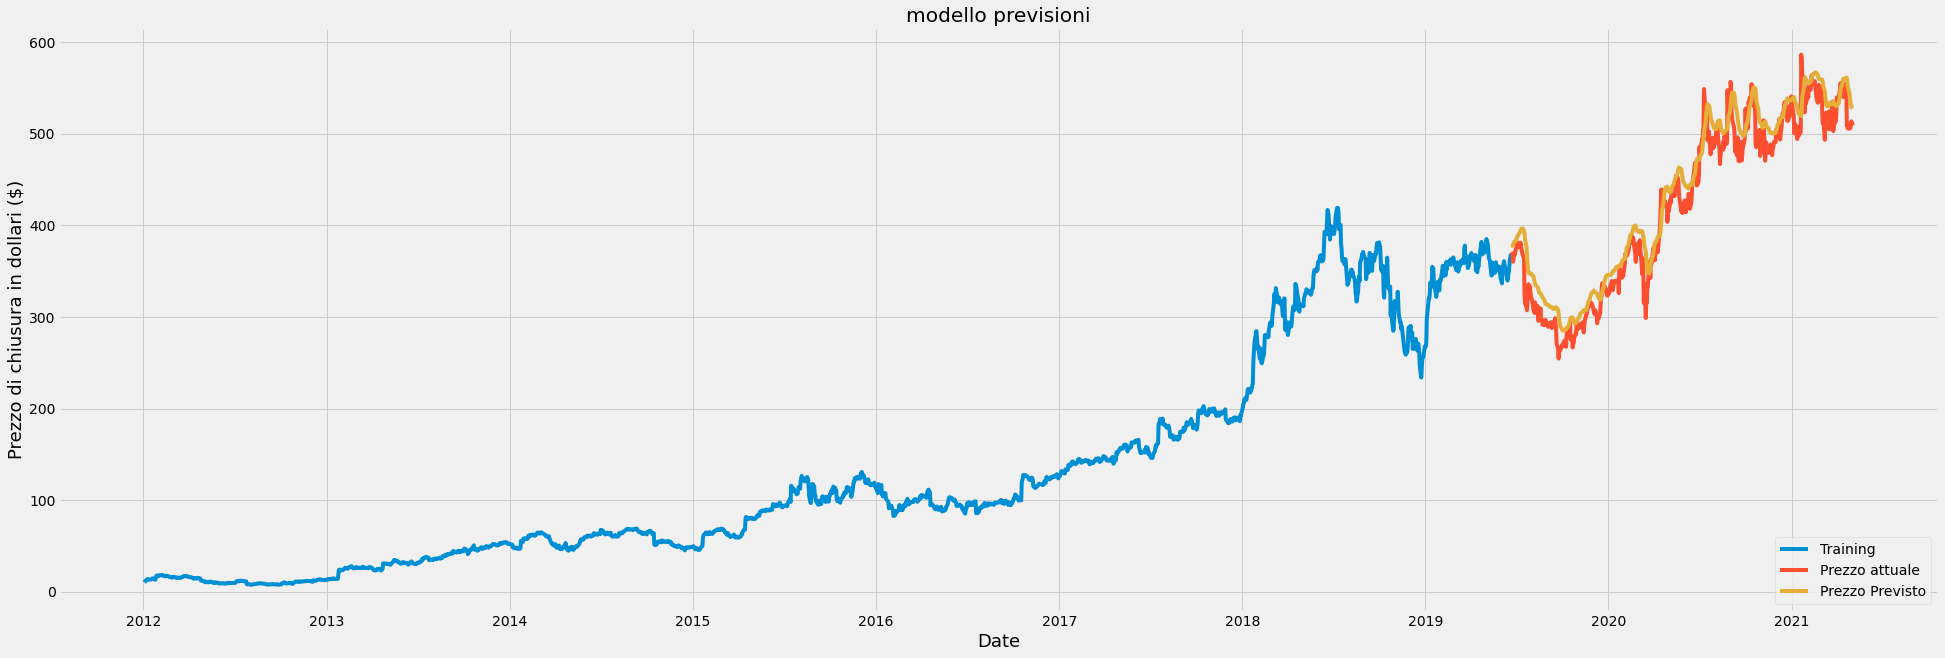

In [38]:
#Tracciamento dei dati

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualizzazione dei dati
plt.figure(figsize=(30 ,10))
plt.title('modello previsioni')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prezzo di chiusura in dollari ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Training', 'Prezzo attuale','Prezzo Previsto'],loc='lower right')
plt.show()


In [39]:
#Mostra il prezzo attuale e il prezzo previsto di Netflix
valid

,Close,Predictions
Date,,
2019-06-24,371.040009,375.640015
2019-06-25,360.299988,378.680298
2019-06-26,362.200012,380.173828
2019-06-27,370.019989,381.010162
2019-06-28,367.320007,382.308594
...,...,...
2021-04-27,505.549988,539.626831
2021-04-28,506.519989,535.071777
2021-04-29,509.000000,531.484436


In [40]:
#Get Quote
netflix_quote = web.DataReader('NFLX', data_source='yahoo', start='2012-01-01',end='today')

#Creazione di un nuovo DataFrame
nuovo_df =netflix_quote.filter(['Close'])

#Prendiamo gli ultimi prezzi di chiusura dei mercati negli ultimi 60 giorni e convertiamoli in un array
ultimi_60_giorni= nuovo_df[-60:].values

#Normalizzazione dei dati tra 0 e 1
ultimi_60_giorni_normalizzati = scaler.transform(ultimi_60_giorni)

#Creazione di una lista vuota

x_test = []

#assegnazione 
x_test.append(ultimi_60_giorni_normalizzati)

#Conversione di x_test in un numpy Array
x_test = np.array(x_test)

#rimodellizzazione dei dati
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#Otteniamo così il prezzo delle nostre previsioni
pred_price= model.predict(x_test)

#annulliamo la normalizzazione 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[527.1277]]
